# COMPUTER VISION SS 2016

# Tutorials: Organisation

## Wann und wo ist die CV Übung?
Immer Dienstags 10:30h - 12:00h im Raum 25.12.01.51.

## Wo finde ich die Projekt Aufgaben?
Im ILIAS (ilias.hhu.de) gibt es zur Vorlesung Computer Vision eine Veranstaltungsseite. Hier laden wir relevantes Material wie Aufgabenzettel etc. hoch.

## Wo kann ich Fragen stellen?
Immer in den Übungen, zur Vorlesung oder gerne auch im ILIAS Forum. Es hilft auch oft sich unter den 
Kommilitonen zu unterstützen. Alternativ können auch Fragen zu den Projekten via Mail an ramakers@hhu.de gesendet werden.

## Wie laufen die Übungen ab?
Die Übungen sind kein Frontalunterricht, wo eine Msuterlösung vorgerechnet wird. Die Übungen sind freiwillig und sind als betreute Projektarbeit zu verstehen. Wir geben in den Übungen Unterstützung zu den Projektaufgaben und zeigen bei Bedarf Code, der hilfreich sein kann.

## Was sind Projekte?
Wir machen keine wöchentlichen Übungsabgaben, sondern 4-5 Projektabgaben. Die Projekte sind umfangreichere Übungszettel und man hat eine Bearbeitungszeit von ca. 3 Wochen. Jede Übung umfasst ca. 100 Punkte und 20-30 Bonuspunkte (mit optional oder bonus markiert).
Zur Lösung des Projektes muss man meist input und output Bilder / Videos erzeugen und neben mathematischen Feinheiten standard CV Algorithmen verstehen und alles in einem Report mit einem strukturierten index.html file dokumentieren. 
Näheres findet man im ILIAS unter how-to-submit-your-report.html

## Lohnen sich die Projekte?
Die Erfahrung aus vergangen Kursen war meist positiv und der Lerneffekt speziell für die Programmieraufgaben sehr gut. Zudem werden die Punkte auch in die finale Note mit eingerechnet (prozentualer Anteil wird am Ende festgelegt, wenn alle Punkte und die Klausur vorhanden sind). D.h. man kann seine Note mit Punkten und speziell Bonuspunkten aus den Projekten verbessern!

## Wie erfolgt die Projektabgabe?
Die Projekte werden elektronisch abgegeben, das Abgabedatum steht auf dem Aufgabenzettel. Da die Dateien bei den Abgaben doch recht groß werden können benutzen wir als File-Sharing System Dropbox. Jeder Student sollte, falls noch nicht vorhanden, sich am besten einen Dropbox Account anlegen und seine Emailadresse an ramakers@hhu.de mit Titel "CV HHU SS 2016 Dropbox <Name>" senden. Wir teilen dann mit jedem Studenten einen individuellen Dropbox Ordner. Falls eine Abgabe außerhalb von Dropbox erwünscht ist, kann der Student zB ein .tar File auch per Download-Link zukommen lassen.

## Wie werden die Projekte bewertet?
Wir bewerten die Projekte zeitnah nach dem Abgabedatum und teilen die Punkte in einem feedback.txt file in den persönlichen Dropbox Ordner. 




# Basic Image Processing

E.g. the Python Image Library (PIL) provides image handling.

In [2]:
from PIL import Image

In [3]:
%pylab inline
# make plots big in notebook
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

Populating the interactive namespace from numpy and matplotlib


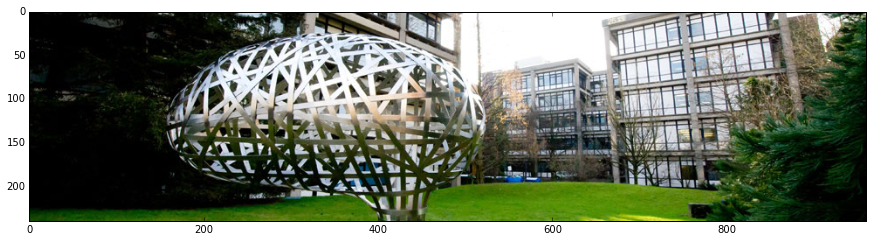

In [4]:
# Show image
pil_img = Image.open('figures/hhu.jpg')
imshow(pil_img)

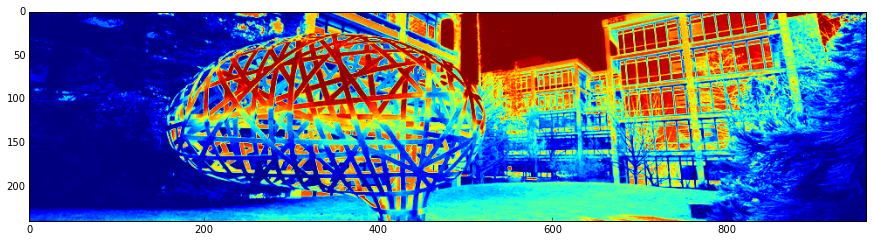

In [5]:
# convert to intensity / greyscale
pil_gray = Image.open('figures/hhu.jpg').convert('L')
imshow(pil_gray)

In [6]:
# Crate thimbnails
# pil_img.size = (960,240)
# pil_thumb = pil_img.thumbnail((320,16))

In [7]:
# copy and paste image regions
# defined by 4-tuple (left,upper,right,lower)
# for PIL: (0,0) = upper left corner - this may be different for other libraries
box = (200,50,500,200)
region = pil_img.crop(box)

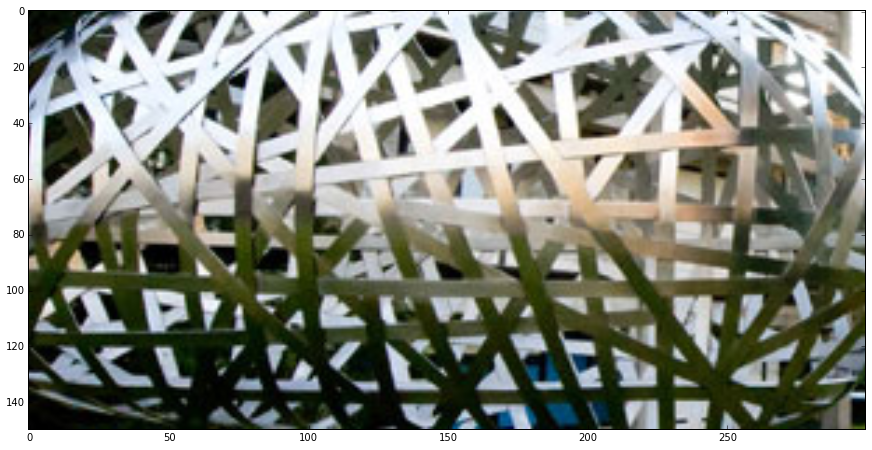

In [8]:
# show region
imshow(region)

In [9]:
# rotate
reg_transpose = region.transpose(Image.ROTATE_180)

# or use counterclockwise angles
# reg_transpose = region.rotate(180)

# resize
smaller_region = region.resize((region.size[0]/2,region.size[1]/2))

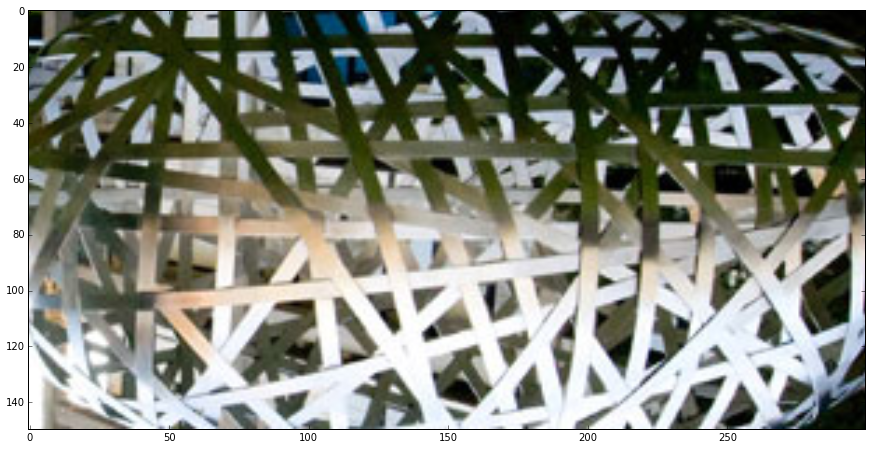

In [10]:
imshow(reg_transpose)

In [11]:
# paste in regions
pil_img.paste(reg_transpose,box)

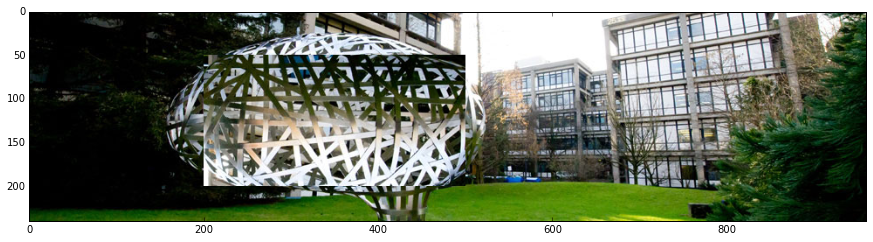

In [12]:
imshow(pil_img)

# Basic Plotting Tools

E.g. a standard goto library in python is matplotlib. For getting started in computer vision we need some plotting tools to show interest points, edges, correspondences, detected objects etc. 

In [13]:
# convert to array
img = array(Image.open('figures/hhu.jpg'))

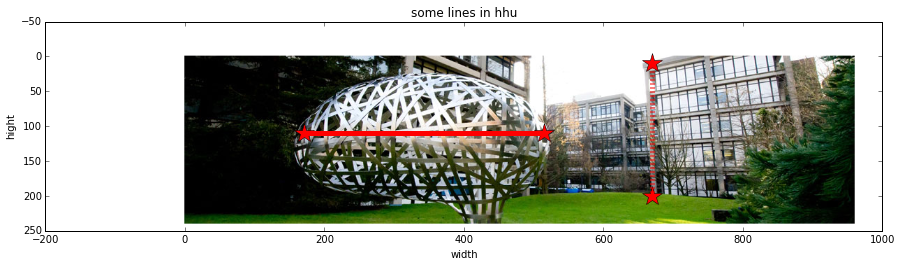

In [14]:
# throw in some points
x = [170,515,670,670]
y = [110,110,10,200]
imshow(img)
plot(x,y,'r*', markersize=20.0)
plot(x[:2],y[:2],'r',linewidth=5.0)
plot(x[2:],y[2:],'r:',linewidth=5.0)
title('some lines in hhu')
xlabel('width')
ylabel('hight')

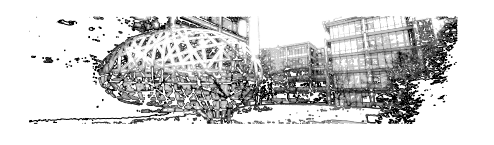

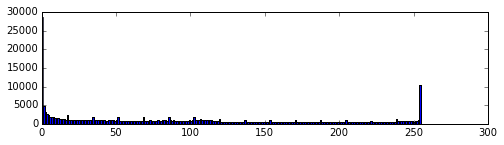

In [15]:
# Some useful operations on grayscale images
gray_img = array(Image.open('figures/hhu.jpg').convert('L'))

# the histogram of image intensity encodes a lot of useful information
from pylab import gray
matplotlib.rcParams['figure.figsize'] = (8.0, 2.0)

figure()
gray()
contour(gray_img,origin='image')
axis('equal')
axis('off')
figure()
hist(gray_img.flatten(),240)
show()

In [16]:
# interactive application
# btw doesnt work inline
"""
%pylab
inter_img = array(Image.open('figures/hhu.jpg'))
imshow(inter_img)
print("Please click")
x = plt.ginput(4)
print("clicked", x)
"""

'\n%pylab\ninter_img = array(Image.open(\'figures/hhu.jpg\'))\nimshow(inter_img)\nprint("Please click")\nx = plt.ginput(4)\nprint("clicked", x)\n'

# Numpy refresher

In [17]:
# Numpy is a package for scientific computations in python, mostly based on array objects.

im = array(Image.open('figures/hhu.jpg'))
print im.shape, im.dtype, "rows,columns,channels: Blue, Green, Red "

im = array(Image.open('figures/hhu.jpg').convert('L'),'f')
print im.shape, im.dtype, "gray scale matrix. float conversion added"

(240, 960, 3) uint8 rows,columns,channels: Blue, Green, Red 
(240, 960) float32 gray scale matrix. float conversion added


In [24]:
# syntax is coordinate i,j and color channel k
# Why 256 values? => hardware history: common unit of memory is 8 bits = 1 byte 
# so each pixel should have 8 bits which means scale is 2**8 = 256 values large
# for graylevel 0 means black and 255 is white
value = img[1,1,1]
print value

0
